***
#### Importing libraries and setting up directory
Libraries used:
    1. os: to handle directory structure
    2. panda: to handle dataframes
    3. munpy and scipy: for numeric and scintific calculation methods
    4. matplotlib and seaborn: to plot and graphic visualization of data
    5. sklearn: for various machine learning models such as KNN imputation, Parameter Search CV, Regression models
    6. patsy: to define structure of model
    7. xgboost: to improve accuracy through ensemble technique
    8. joblib: to save model
***

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
from geopy.distance import geodesic, distance
import matplotlib as mpl
import seaborn as sns
from sklearn.impute import KNNImputer
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics as mtr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import joblib

os.chdir('K:\\Data_Science\\Project_01\\Trials')

*** 
#### Loading and getting an overview of train and test data
Train and test csv files saved in different dataframes[dfTrain, dfTest]. 
*** 

In [2]:
dfTrain =  pd.read_csv('train_cab.csv')
dfTest = pd.read_csv('test.csv')
dfData = [dfTrain, dfTest]

for data in dfData:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff

In [3]:
dfTrain.describe(include = 'all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043,16067,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
unique,468,16021,NaN,NaN,NaN,NaN,NaN
top,6.5,2012-12-06 18:05:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,759,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,NaN,NaN,10.578384,6.826587,10.575062,6.187087,60.844122
min,NaN,NaN,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,NaN,NaN,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,NaN,NaN,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,NaN,NaN,-73.966838,40.767381,-73.963643,40.768013,2.000000


In [4]:
dfTest.describe(include = 'all')

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
unique,1753,NaN,NaN,NaN,NaN,NaN
top,2011-12-13 22:00:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,270,NaN,NaN,NaN,NaN,NaN
mean,NaN,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,NaN,0.042774,0.033541,0.039072,0.035435,1.278747
min,NaN,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,NaN,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,NaN,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,NaN,-73.968013,40.767113,-73.964059,40.768757,2.000000


***
#### Correcting data types of data frames
* pickup_datetime saved as "datetime" type
* fare amount saved as "numeric" type
***

In [5]:
dfTrain['fare_amount'] = pd.to_numeric(dfTrain['fare_amount'], errors = 'coerce')

for data in dfData:
    data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'], errors = 'coerce')
    data.info()
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16042 non-null  float64            
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16067 non-null  float64            
 3   pickup_latitude    16067 non-null  float64            
 4   dropoff_longitude  16067 non-null  float64            
 5   dropoff_latitude   16067 non-null  float64            
 6   passenger_count    16012 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]


***
#### Removing nonsensical values from train data set
removed observations containing nonsensical values:
1. unusual fare amount such as non-positive 
2. unreal passenger count such as 0 or more than 6
3. and extreme geolocations dropped.
***

In [6]:
#removing data with NOK fare amount
dfTrain = dfTrain[~(dfTrain['fare_amount']<1)]

#removing data with NOK passenger count
dfTrain = dfTrain[~((dfTrain['passenger_count']<1) | (dfTrain['passenger_count']>6))]

#removing data with NOK pickup longitude
dfTrain = dfTrain[~((dfTrain['pickup_longitude']<-75.5) | (dfTrain['pickup_longitude']>-71.8))]

#removing data with NOK pickup lattitude
dfTrain = dfTrain[~((dfTrain['pickup_latitude']<39.5) | (dfTrain['pickup_latitude']>41.9))]

#removing data with NOK dropoff longitude
dfTrain = dfTrain[~((dfTrain['dropoff_longitude']<-75.5) | (dfTrain['dropoff_longitude']>-71.8))]

#removing data with NOK dropoff lattitude
dfTrain = dfTrain[~((dfTrain['dropoff_latitude']<39.5) | (dfTrain['dropoff_latitude']>41.9))]

dfTrain.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15628.000000,15650.000000,15650.000000,15650.000000,15650.000000,15595.000000
mean,15.117504,-73.974837,40.750928,-73.973857,40.751417,1.650356
std,436.121517,0.041507,0.037986,0.039340,0.039648,1.265914
min,1.140000,-74.438233,39.603178,-74.429332,39.604972,1.000000
25%,6.000000,-73.992398,40.736578,-73.991372,40.736321,1.000000
50%,8.500000,-73.982055,40.753345,-73.980567,40.754256,1.000000
75%,12.500000,-73.968108,40.767809,-73.965390,40.768332,2.000000
max,54343.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000


***
#### Visualizing distribution of the data in train dataset
* violin plot used for distribution of individual variables 
* pairwise plot used for correlation of each pair of variables
***

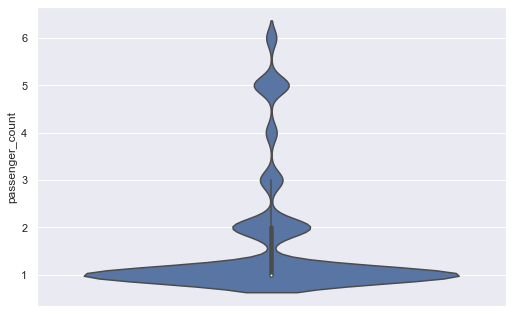

In [7]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y = dfTrain['passenger_count'])

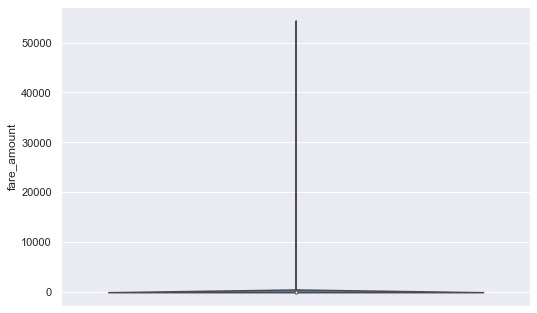

In [8]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y =dfTrain['fare_amount'])

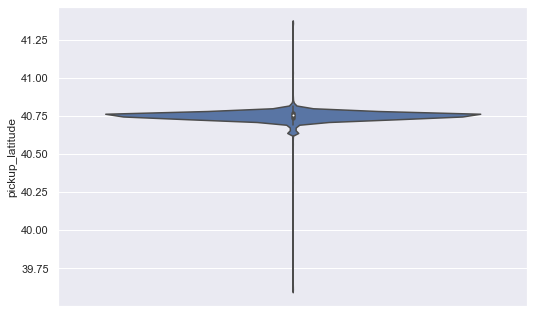

In [9]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y = dfTrain['pickup_latitude'])

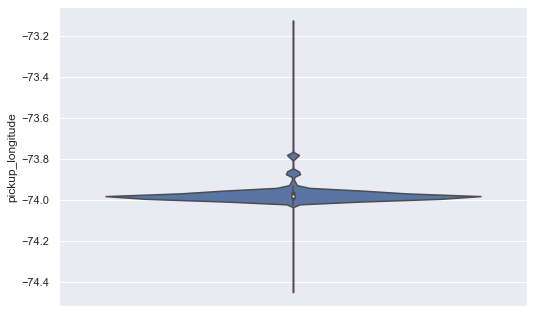

In [10]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y = dfTrain['pickup_longitude'])

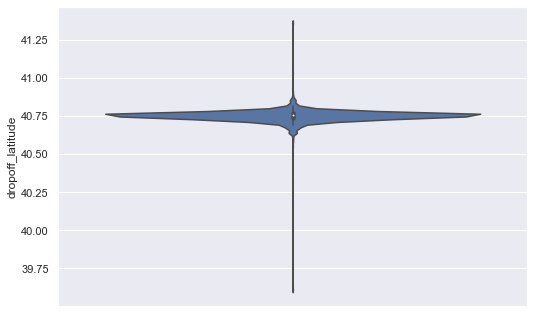

In [11]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y = dfTrain['dropoff_latitude'])

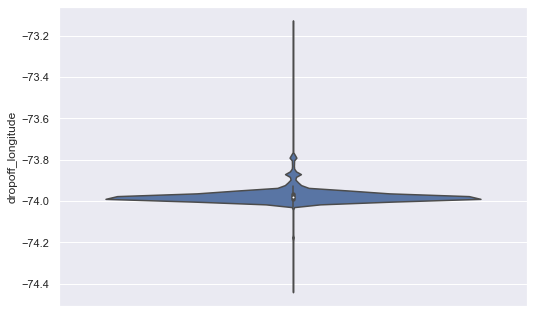

In [12]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y =dfTrain['dropoff_longitude'])

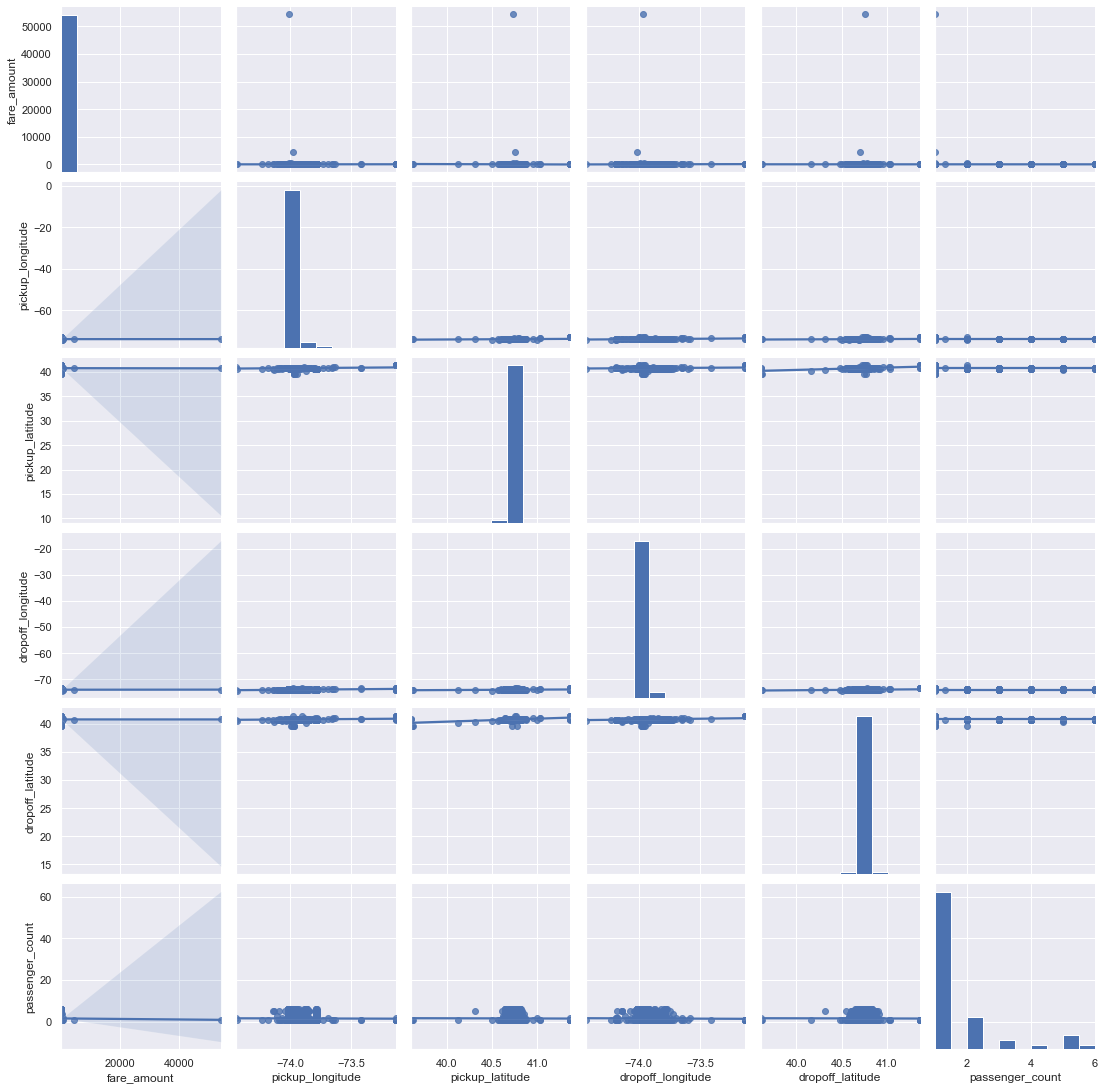

In [13]:
num_var=['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'passenger_count']
sns.pairplot(data=dfTrain[num_var],kind='reg',dropna=True)

***
#### Deriving new and usefull features for analysis
new features created to better explain model
***

features based on geographic coordinates

In [14]:
def dist(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

def len_trip(row):
    if (row['geodesic'] >= 15):
        return 'long'
    elif (row['geodesic'] < 15):
        return 'short'

dfTrain['geodesic'] = dfTrain.apply(dist, axis =1)
dfTest['geodesic'] = dfTest.apply(dist, axis = 1)

dfTrain['trip'] = dfTrain.apply(len_trip, axis =1)
dfTest['trip'] = dfTest.apply(len_trip, axis =1)

features based on pickup date_time

In [15]:
def season(row):
    month = row['pickup_datetime'].month
    if (month >2) & (month <= 5):
        return 'spring'
    elif (month >5) & (month <=8 ):
        return 'summer'
    elif (month >8) & (month <= 11):
         return'fall'
    elif (month > 11)|(month <= 2) :
        return 'winter'

def shift(row):
    hour = row['pickup_datetime'].hour
    if (hour > 2) & (hour <=8):
        return 'dawn'
    elif (hour > 8) & (hour <= 14):
        return 'morning'
    elif (hour > 14) & (hour <= 20):
        return 'evening'
    elif (hour > 20) | (hour <= 2):
        return 'night'
    
def weekDay(row):
    day = row['pickup_datetime'].dayofweek
    if (day >= 5):
        return 'weekend'
    elif (day < 5):
        return 'weekday'
    


#feature derivation from datetime
dfTrain['year'] = dfTrain.apply(lambda row: row['pickup_datetime'].year, axis =1)
dfTest['year'] = dfTest.apply(lambda row: row['pickup_datetime'].year, axis =1)

dfTrain['month'] = dfTrain.apply(lambda row: row['pickup_datetime'].month, axis =1)
dfTest['month'] = dfTest.apply(lambda row: row['pickup_datetime'].month, axis =1)

dfTrain['dayofwk'] = dfTrain.apply(lambda row: row['pickup_datetime'].dayofweek, axis =1)
dfTest['dayofwk'] = dfTest.apply(lambda row: row['pickup_datetime'].dayofweek, axis =1)

dfTrain['hour'] = dfTrain.apply(lambda row: row['pickup_datetime'].hour, axis =1)
dfTest['hour'] = dfTest.apply(lambda row: row['pickup_datetime'].hour, axis =1)

#new variables for seasonal surcharges
dfTrain['season'] = dfTrain.apply(season, axis =1)
dfTest['season'] = dfTest.apply(season, axis =1)

dfTrain['weekday'] = dfTrain.apply(weekDay, axis =1)
dfTest['weekday'] = dfTest.apply(weekDay, axis =1)

dfTrain['shift'] = dfTrain.apply(shift, axis =1)
dfTest['shift'] = dfTest.apply(shift, axis =1)



***
#### Cleaning data train data
missing values and outliers for each attribute checked
***

In [16]:
miss_val = pd.DataFrame(dfTrain.isnull().sum())
miss_val = miss_val.rename(columns = {'index': 'Variables', 0: 'Missing Count'})
miss_val['Missing Pcent'] = (miss_val['Missing Count']/len(dfTrain))*100
miss_val

,Missing Count,Missing Pcent
fare_amount,22,0.140575
pickup_datetime,1,0.006390
pickup_longitude,0,0.000000
pickup_latitude,0,0.000000
dropoff_longitude,0,0.000000
dropoff_latitude,0,0.000000
passenger_count,55,0.351438
geodesic,0,0.000000
trip,0,0.000000
year,1,0.006390


***
#### Treating missing values
In first step, some observation with missing values dropped with insignificant loss in data
***

In [17]:
dfTrain.loc[(dfTrain['geodesic']<0.05), 'geodesic'] = np.nan
dfTrain = dfTrain.dropna(subset = ['fare_amount', 'pickup_datetime', 'geodesic']).reset_index(drop = True)

***
#### Replaceing outliers with NaN to impute values later
In second step, outlier values also replaced with NaN and masked as missing values
***

In [18]:
def replaceOutlier(col):
    Q1 = np.percentile(dfTrain[col], 25)
    Q3 = np.percentile(dfTrain[col], 75)
    Max_Bound = Q3 + 1.5*(Q3-Q1)
    Min_Bound = Q1 - 1.5*(Q3-Q1)
    
    dfTrain.loc[((dfTrain[col]<Min_Bound)|(dfTrain[col]>Max_Bound)), col] = np.nan
    return


to_modify = ['fare_amount', 'geodesic']

for var in to_modify:
    replaceOutlier(var)

dfTrain.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,geodesic,year,month,dayofwk,hour
count,14076.000000,15404.000000,15404.000000,15404.000000,15404.000000,15349.000000,14069.000000,15404.000000,15404.000000,15404.000000,15404.000000
mean,8.949371,-73.975289,40.750763,-73.974313,40.751263,1.653026,2.478721,2011.739938,6.271877,3.034926,13.506751
std,4.131822,0.037878,0.036232,0.035432,0.037995,1.268635,1.660241,1.870407,3.449541,1.970819,6.503403
min,1.140000,-74.438233,39.603178,-74.227047,39.604972,1.000000,0.059825,2009.000000,1.000000,0.000000,0.000000
25%,5.700000,-73.992410,40.736621,-73.991376,40.736394,1.000000,1.224985,2010.000000,3.000000,1.000000,9.000000
50%,8.000000,-73.982102,40.753366,-73.980612,40.754266,1.000000,2.008429,2012.000000,6.000000,3.000000,14.000000
75%,11.000000,-73.968232,40.767805,-73.965603,40.768338,2.000000,3.304178,2013.000000,9.000000,5.000000,19.000000
max,22.100000,-73.137393,41.366138,-73.137393,41.366138,6.000000,7.930015,2015.000000,12.000000,6.000000,23.000000


***
#### Imputing missing values
After replacing outliers with missing vallues, all missing values are imputed. Two methods checked for imputing missing values
* With statistical mean: for imputing missing values first mean of data checked
* With KNN Imputation: for KNN imputation a subset of data created
***

In [19]:
dfImputer = dfTrain[['fare_amount', 'geodesic', 'year', 'month', 'hour', 'dayofwk', 'passenger_count']].copy()
dfImputer.isnull().sum()

fare_amount        1328
geodesic           1335
year                  0
month                 0
hour                  0
dayofwk               0
passenger_count      55
dtype: int64

of the subset a sample taken for validation.

In [20]:
dfImputTrial = dfImputer.sample(frac = 0.02).copy().dropna().reset_index(drop = True)
dfImputValid = dfImputTrial.copy()
ranInd = np.random.randint(0, high = len(dfImputTrial), size = 5)
dfImputTrial.isnull().sum()

fare_amount        0
geodesic           0
year               0
month              0
hour               0
dayofwk            0
passenger_count    0
dtype: int64

random values set to NaN to validate KNN Imputation

In [21]:
for i in ranInd:
    dfImputTrial['passenger_count'].loc[i] = np.nan
    dfImputTrial['geodesic'].loc[i] = np.nan
    dfImputTrial['fare_amount'].loc[i] = np.nan
    

With statistical mean: for imputing missing values first mean of data checked

In [22]:
print(dfImputer['passenger_count'].mean(), dfImputer['fare_amount'].mean(), dfImputer['geodesic'].mean())

1.6530262557821356 8.94937127024727 2.4787213725522497


imputed values crosschecked with true values

In [23]:
naImputer = KNNImputer(n_neighbors = 5)
naImputer.fit(dfImputTrial)
naImputed = naImputer.transform(dfImputTrial)
print('IP', 'VP', 'IF', 'VF', 'IG', 'VG')
for i in ranInd:    
    print((naImputed[i, 6].round()),'|', dfImputValid['passenger_count'].loc[i],'||',
          (naImputed[i, 0].round(decimals = 2)),'|', dfImputValid['fare_amount'].loc[i].round(decimals = 1), '||',
          (naImputed[i, 1].round(decimals = 2)),'|', dfImputValid['geodesic'].loc[i].round(decimals = 1))
   

IP VP IF VF IG VG
1.0 | 2.0 || 7.8 | 4.5 || 2.13 | 1.0
2.0 | 1.0 || 8.62 | 17.0 || 2.13 | 4.8
2.0 | 1.0 || 6.62 | 12.0 || 1.13 | 3.6
3.0 | 1.0 || 7.62 | 9.5 || 1.51 | 2.9
2.0 | 1.0 || 9.22 | 4.5 || 3.01 | 1.1


std deviation checked before and after imputation

In [24]:
print(np.std(naImputed[:,6].round()), np.std(naImputed[:,0]), np.std(naImputed[:,1]))
print(dfImputValid['passenger_count'].std(),dfImputValid['fare_amount'].std(),dfImputValid['geodesic'].std())

1.3874280758538362 4.081993798048414 1.5065464202356897
1.3900615918031953 4.136580069157395 1.5191336009200622


imputing values with KNN Imputation for original data

In [25]:
theImputer = KNNImputer(n_neighbors = 5)
theImputer.fit(dfImputer)
theImputed = theImputer.transform(dfImputer)

dfTrain['passenger_count'] = theImputed[:,6].round()
dfTrain['fare_amount'] = theImputed[:,0]
dfTrain['geodesic'] = theImputed[:,1]

In [26]:
dfTrain.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
geodesic             0
trip                 0
year                 0
month                0
dayofwk              0
hour                 0
season               0
weekday              0
shift                0
dtype: int64

***
#### Understanding relation between variables
distribution and correlation after missing value and oulier correction checked
***

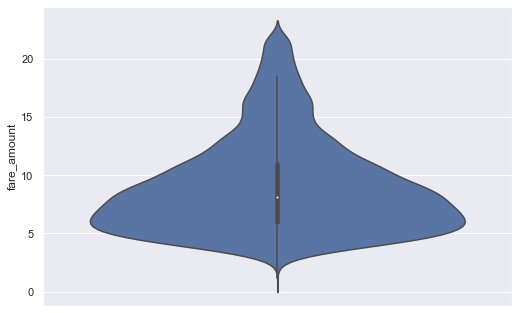

In [27]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y =dfTrain['fare_amount'])

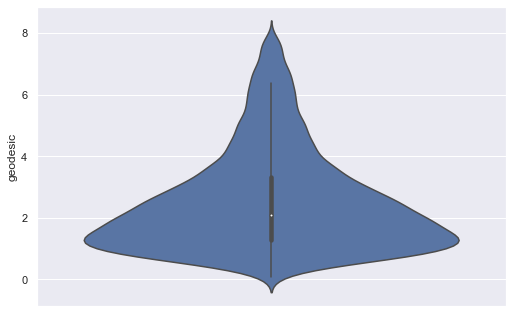

In [28]:
sns.set(rc={'figure.figsize':(8.4,5.5)})
sns.violinplot(y =dfTrain['geodesic'])

***
If any variables are correleated is checked with help of heatmap of correlation coeficient

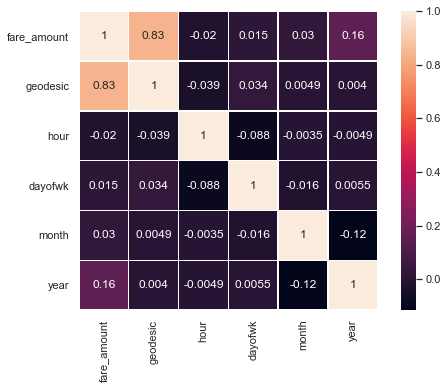

In [29]:
sns.heatmap(dfTrain[['fare_amount', 'geodesic', 'hour', 'dayofwk','month', 'year']].corr(), square=True, linewidths=0.5,linecolor='w',annot=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


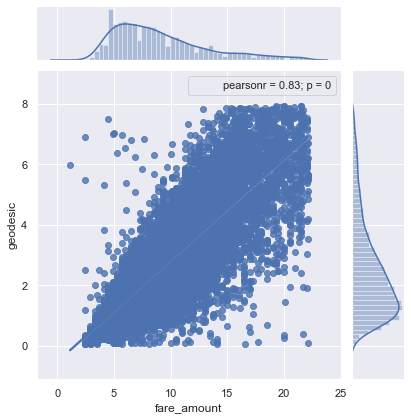

In [30]:
sns.jointplot(x='fare_amount',y='geodesic',data=dfTrain, kind = 'reg').annotate(sp.stats.pearsonr)

***
#### Transforming variables to suit model
categorical varibles transformed with one-hot coding.
old variables dropped from the data set.
one dummy variable of each category dropped to avoid multi-colinearity problem.
***

In [31]:
categorical = ['passenger_count', 'year', 'season', 'weekday', 'shift', 'trip']
integral = ['passenger_count', 'year']

dfTrain[integral] = dfTrain[integral].apply(np.int64)
dfTest[integral] = dfTest[integral].apply(np.int64)

    
#dummy variables created
for var in categorical:
    dfDummy1 = pd.get_dummies(dfTrain[var], prefix = var)
    dfTrain = dfTrain.join(dfDummy1)
    
    dfDummy2 = pd.get_dummies(dfTest[var], prefix = var)
    dfTest = dfTest.join(dfDummy2)   


In [32]:
#old variables dropped    
dfTrain = dfTrain.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
                  'passenger_count', 'year', 'season', 'weekday', 'month', 'shift', 'trip', 'dayofwk', 'hour'], axis =1)
dfTest = dfTest.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
                  'passenger_count', 'year', 'season', 'weekday', 'month', 'shift', 'trip', 'dayofwk', 'hour'], axis =1)


#one dummy variable dropped
dfTrain = dfTrain.drop(['passenger_count_1', 'year_2009', 'season_fall', 'weekday_weekday', 'shift_dawn', 'trip_short'], axis =1)
dfTest = dfTest.drop(['passenger_count_1', 'year_2009', 'season_fall', 'weekday_weekday', 'shift_dawn', 'trip_short'], axis =1)
    

***
#### Checking multicolinearity in data
with help of VIF, multicolinearity in data is checked.
* if VIF = 1        -> No colinearity in any variables.
* if 1 <= VIF <= 5  -> Moderate corinearity
* if VIF > 5        -> High colinearity
if multiple variables have more than 5 VIF, one with highest VIF will be dropped
***

In [33]:
features = " + ".join(dfTrain.columns)
features = features.replace("fare_amount + ", "")

target, attributes = dmatrices("fare_amount ~ " + features, dfTrain, return_type='dataframe')

In [34]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(attributes.values, i) for i in range(attributes.shape[1])]
vif['INPUTS'] = attributes.columns
vif

,VIF,INPUTS
0,18.446588,Intercept
1,1.021056,geodesic
2,1.040459,passenger_count_2
3,1.019080,passenger_count_3
4,1.011632,passenger_count_4
5,1.025666,passenger_count_5
6,1.017437,passenger_count_6
7,1.687318,year_2010
8,1.687776,year_2011
9,1.709798,year_2012


***
#### Building models and checking performance
* train data split to validate performance.
* sevral functions defined to visualize and calculate model statistics
***

In [35]:
X = dfTrain.drop(['fare_amount'], axis = 1).values
Y = dfTrain['fare_amount'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=35)

In [36]:
def scores(y_true, y_pred):
    
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100

    r2 = mtr.r2_score(y_true, y_pred)

    rms = np.sqrt(mtr.mean_squared_error(y_true, y_pred))

    return [mape, r2, rms]

def model_scores(model):
    
    y_trPred = model.predict(X_train)
    trScore = scores(Y_train, y_trPred)
    
    y_tsPred = model.predict(X_test)
    tsScore = scores(Y_test, y_tsPred)
    
    data = {'train' : trScore, 'test' : tsScore}
    dfScore = pd.DataFrame(data, index = ['MAPE', 'R2', 'RMSE'])
    
    print(dfScore)
    return dfScore

def model_plot(model):
    
    coefModel = model.coef_

    mpl.pyplot.plot(range(len(dfTest.columns)), coefModel)
    mpl.pyplot.xticks(range(len(dfTest.columns)), dfTest.columns.values, rotation=75)
    
    return

def tree_plot(model):
    
    coefModel = model.feature_importances_

    mpl.pyplot.plot(range(len(dfTest.columns)), coefModel)
    mpl.pyplot.xticks(range(len(dfTest.columns)), dfTest.columns.values, rotation=75)
    
    return  

##### Linear Regression Model

In [37]:
lin_reg_trial = LinearRegression()

param_grid = {'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]}

LinRegCV = GridSearchCV(lin_reg_trial, param_grid, cv=5, scoring='r2')
LinRegCV.fit(X, Y)

print("Optimum Parameters: {}".format(LinRegCV.best_params_))
print("Optimum score     : {}".format(LinRegCV.best_score_))

Optimum Parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Optimum score     : 0.7314191269457941


          train       test
MAPE  17.448193  17.876085
R2     0.727850   0.742516
RMSE   2.112474   2.112242


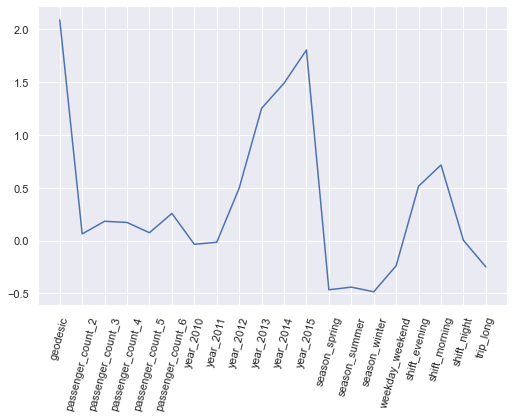

In [38]:
lin_reg_model = LinearRegression(copy_X = True, fit_intercept = True, normalize = True)
lin_reg_model.fit(X_train,Y_train)

Yp_linreg = lin_reg_model.predict(X_test)

scoreLinReg = model_scores(lin_reg_model)

model_plot(lin_reg_model)


##### Ridge Regression Model

In [39]:
ridge_reg_trial = Ridge()

param_grid = {'alpha':np.logspace(-4, 0, 75), 'normalize':[True,False], 'max_iter':range(100,1000,100)}

RidgeRegCV = GridSearchCV(ridge_reg_trial, param_grid, cv=5, scoring='r2')
RidgeRegCV.fit(X, Y)

print("Optimum Parameters: {}".format(RidgeRegCV.best_params_))
print("Optimum score     : {}".format(RidgeRegCV.best_score_))

Optimum Parameters: {'alpha': 1.0, 'max_iter': 100, 'normalize': False}
Optimum score     : 0.7314196704388056


          train       test
MAPE  17.447869  17.875432
R2     0.727850   0.742517
RMSE   2.112475   2.112241


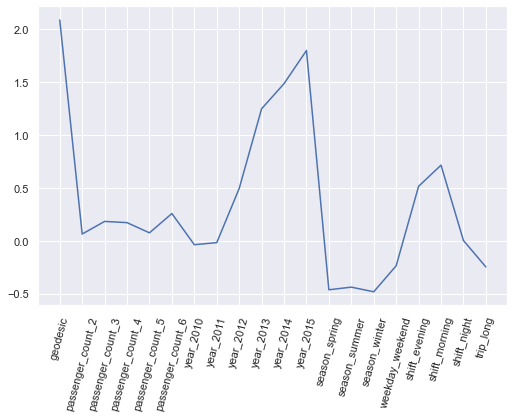

In [40]:
ridge_reg_model = Ridge(alpha = 1.0, max_iter = 100, normalize = False)
ridge_reg_model.fit(X_train,Y_train)

Yp_ridgeReg = ridge_reg_model.predict(X_test)

scoreRidgeReg = model_scores(ridge_reg_model)

model_plot(ridge_reg_model)

##### Lasso Regression Model

In [41]:
lasso_reg_trial = Lasso()

param_grid = {'alpha':np.logspace(-4, 0, 75), 'normalize':[True,False], 'max_iter':range(100,1000,100)}

LassoRegCV = GridSearchCV(lasso_reg_trial, param_grid, cv=5, scoring='r2')
LassoRegCV.fit(X, Y)

print("Optimum Parameters: {}".format(LassoRegCV.best_params_))
print("Optimum score     : {}".format(LassoRegCV.best_score_))

Optimum Parameters: {'alpha': 0.0004452958509942655, 'max_iter': 100, 'normalize': False}
Optimum score     : 0.7314249966863244


          train       test
MAPE  17.445332  17.874590
R2     0.727846   0.742497
RMSE   2.112492   2.112322


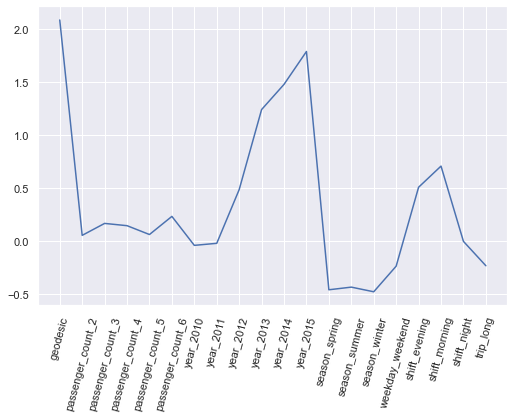

In [42]:
lasso_reg_model = Lasso(alpha = 0.0004452958509942655, max_iter = 100, normalize = False)
lasso_reg_model.fit(X_train,Y_train)

Yp_lassoReg = lasso_reg_model.predict(X_test)

scoreLassoReg = model_scores(lasso_reg_model)

model_plot(lasso_reg_model)

##### Decision Tree Regression Model

In [43]:
detree_reg_trial = DecisionTreeRegressor()

param_grid = {'criterion': ['mse', 'mae'], 'max_depth': range(2,10,2), 'min_samples_split': range(2,10,2)}

DeTreeRegCV = RandomizedSearchCV(detree_reg_trial, param_grid, cv=5, scoring='r2')
DeTreeRegCV.fit(X, Y)

print("Optimum Parameters: {}".format(DeTreeRegCV.best_params_))
print("Optimum score     : {}".format(DeTreeRegCV.best_score_))

Optimum Parameters: {'min_samples_split': 4, 'max_depth': 6, 'criterion': 'mse'}
Optimum score     : 0.7125962743074015


          train       test
MAPE  17.536055  18.474367
R2     0.729539   0.727468
RMSE   2.105909   2.173092


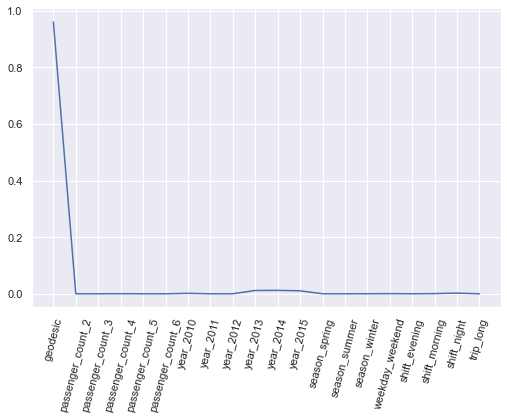

In [45]:
detree_reg_model = DecisionTreeRegressor(min_samples_split = 4, max_depth = 6, criterion = 'mse')
detree_reg_model.fit(X_train,Y_train)

Yp_detreeReg = detree_reg_model.predict(X_test)

scoreDetreeReg = model_scores(detree_reg_model)

tree_plot(detree_reg_model)

##### Random Forest Regression Model

In [46]:
randfr_reg_trial = RandomForestRegressor()

param_grid = {'n_estimators': range(100,500,100), 'max_depth': range(5,20,3), 'min_samples_leaf':range(2,5,1), 'max_features':['auto','sqrt','log2'], 'bootstrap': [True, False], 'min_samples_split': range(2,5,1)}

RandFrRegCV = RandomizedSearchCV(randfr_reg_trial, param_grid, cv=5)
RandFrRegCV.fit(X,Y)

print("Optimum Parameters: {}".format(RandFrRegCV.best_params_))
print("Optimum score     : {}".format(RandFrRegCV.best_score_))

Optimum Parameters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 14, 'bootstrap': True}
Optimum score     : 0.7257660829011023


          train       test
MAPE  13.759257  17.931695
R2     0.830670   0.742405
RMSE   1.666303   2.112698


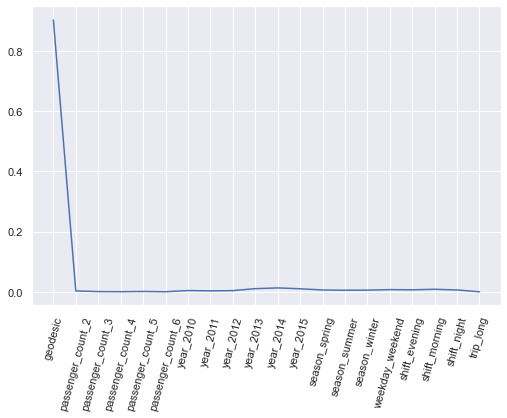

In [47]:
rforest_reg_model = RandomForestRegressor(n_estimators = 200, min_samples_split = 3, min_samples_leaf = 4, max_features = 'auto', max_depth = 14, bootstrap = True)
rforest_reg_model.fit(X_train,Y_train)

Yp_rforestReg = rforest_reg_model.predict(X_test)

scoreRForestReg = model_scores(rforest_reg_model)

tree_plot(rforest_reg_model)

##### Improving Accuracy through xgboost

In [48]:
dData = xgb.DMatrix(data=X,label=Y)
dTrain = xgb.DMatrix(X_train, label=Y_train)
dTest = xgb.DMatrix(X_test)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.5,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}
cv_results = xgb.cv(dtrain=dData, params=params, nfold=5, num_boost_round=75, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

print((cv_results["test-rmse-mean"]).tail(1))

74    2.082558
Name: test-rmse-mean, dtype: float64


In [49]:
xgb_reg_trial = xgb.XGBRegressor()

param_grid = {'n_estimators': range(100,500,100),  'reg_alpha':np.logspace(-3, 0, 30), 'colsample_bytree': np.arange(0.1,1,0.2), 'learning_rate': np.arange(0.1, 1, 0.1)}
XGBRegCV = RandomizedSearchCV(xgb_reg_trial, param_grid, cv=5)
XGBRegCV.fit(X,Y)

print("Optimum Parameters: {}".format(XGBRegCV.best_params_))
print("Optimum score     : {}".format(XGBRegCV.best_score_))

Optimum Parameters: {'reg_alpha': 0.11721022975334805, 'n_estimators': 100, 'learning_rate': 0.1, 'colsample_bytree': 0.9000000000000001}
Optimum score     : 0.7384874075837606


          train       test
MAPE  15.873809  17.403499
R2     0.775923   0.752668
RMSE   1.916841   2.070184


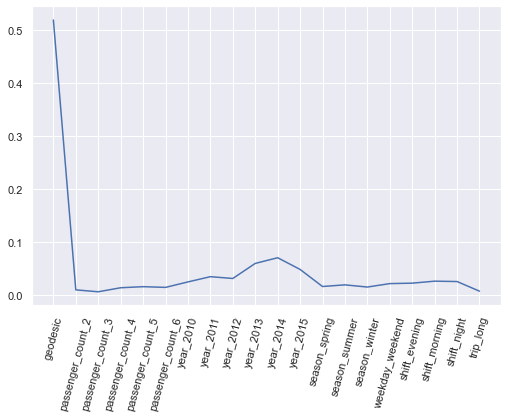

In [50]:
xgb_reg_model = xgb.XGBRegressor(reg_alpha = 0.11721022975334805, n_estimators = 100, learning_rate = 0.1, max_depth = 5, colsample_bytree = 0.90000000000000001)
xgb_reg_model.fit(X_train,Y_train)

Yp_xgbReg = xgb_reg_model.predict(X_test)

scoreRForestReg = model_scores(xgb_reg_model)

tree_plot(xgb_reg_model)

***
#### Training entire train data set and predicting values for test dataset
***

In [51]:
xgb_reg_final = xgb.XGBRegressor(reg_alpha = 0.11721022975334805, n_estimators = 100, learning_rate = 0.1, max_depth = 5, colsample_bytree = 0.90000000000000001)
xgb_reg_final.fit(X, Y)

Y_Check = xgb_reg_final.predict(X)

testScores = scores(Y, Y_Check)
pd.DataFrame(testScores, index = ['MAPE', 'R2', 'RMSE'])

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,0
MAPE,16.103973
R2,0.774570
RMSE,1.938980


***
Predicing fare amount for test dataset and saving output and final model.
***

In [52]:
Y_Out = xgb_reg_final.predict(dfTest.values)

pd.DataFrame({'fare_amount' : Y_Out}).to_csv("cabfare_xgb_output_py.csv")

joblib.dump(xgb_reg_final, 'cabfare_xgbmodel_py.pkl')

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


['cabfare_xgbmodel_py.pkl']